[*********************100%%**********************]  4 of 4 completed
Checking stationarity for AAPL...
ADF Statistic: 0.24379382128268767
p-value: 0.9746136219181826
Series is non-stationary, applying first differencing...
Checking stationarity for MSFT...
ADF Statistic: 0.7321676361067783
p-value: 0.990458445052081
Series is non-stationary, applying first differencing...
Checking stationarity for NVDA...
ADF Statistic: 1.3171141282981433
p-value: 0.9967030609238148
Series is non-stationary, applying first differencing...
Checking stationarity for ^IXIC...
ADF Statistic: -0.37261505193184175
p-value: 0.9145716560674123
Series is non-stationary, applying first differencing...
Fitting GARCH(2,1) model for AAPL...
Iteration:      1,   Func. Count:      7,   Neg. LLF: 22868.003052092135
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3884103.884314823
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3503.9194343665977
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3458.22

/Users/kanupriya1190/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.84e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


      lb_stat     lb_pvalue
10  95.860747  3.658671e-16
Performing Ljung-Box test for NVDA...
      lb_stat  lb_pvalue
10  29.747975   0.000942
Performing Ljung-Box test for ^IXIC...
      lb_stat     lb_pvalue
10  92.690753  1.565136e-15


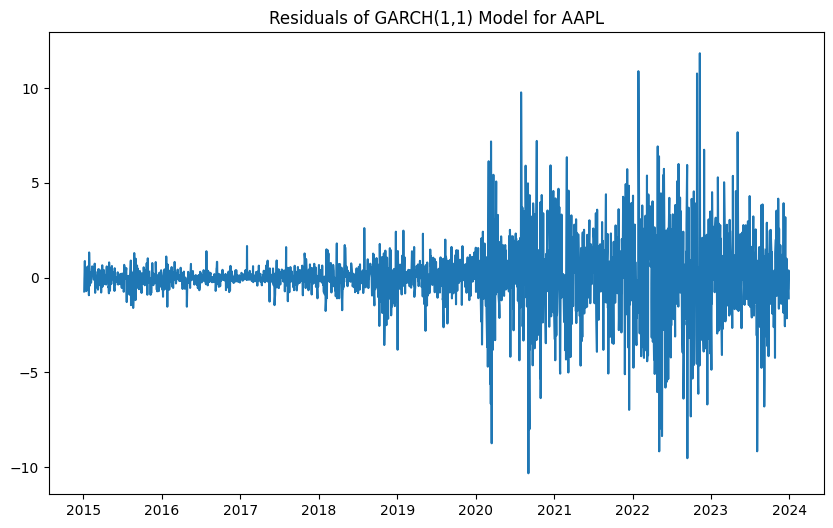

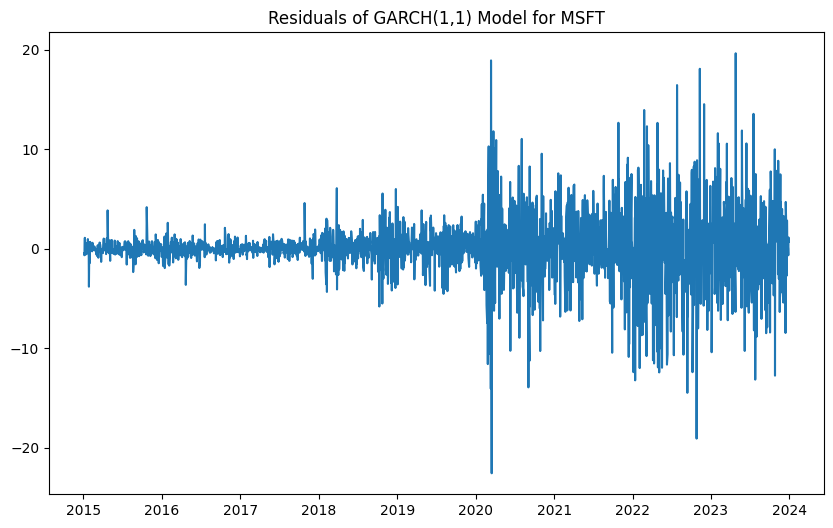

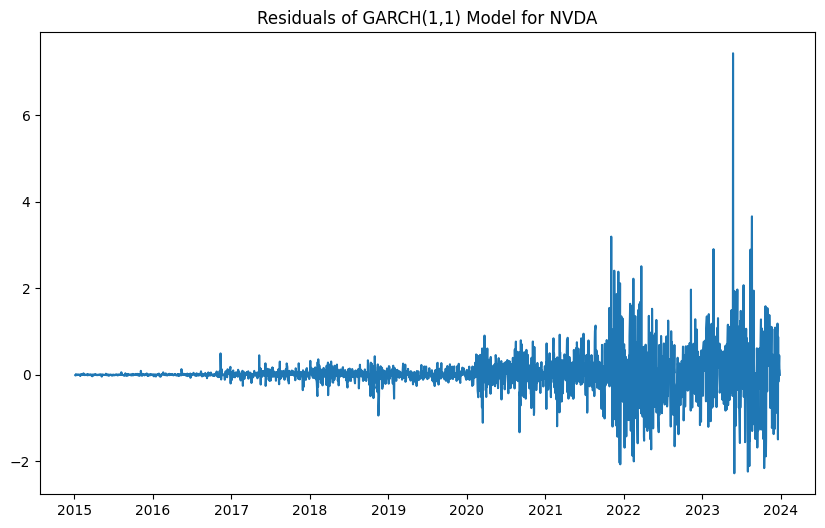

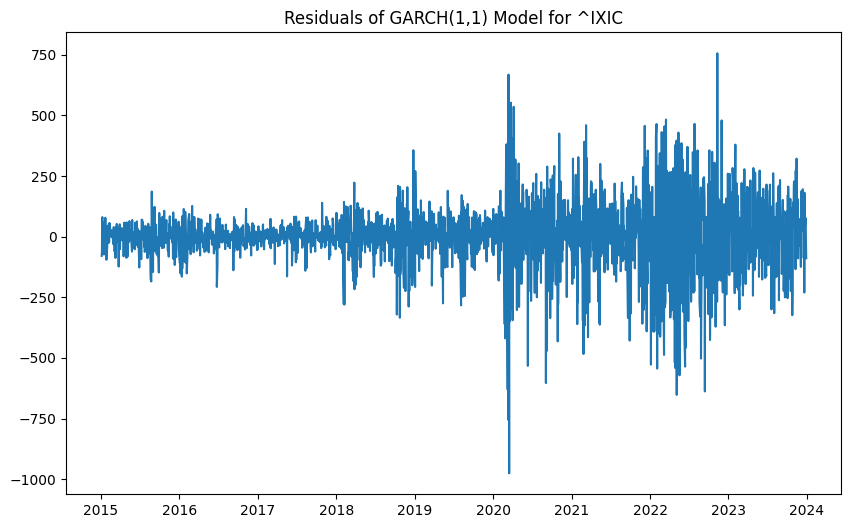

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import yfinance as yf

# Download stock data from Yahoo Finance for GS, AIG, MSFT, and S&P 500
stocks = ['^IXIC', 'AAPL', 'MSFT', 'NVDA']
data = yf.download(stocks, start="2015-01-01", end="2024-01-01")['Adj Close']

# Function to check for stationarity with ADF test
def check_stationarity(stock_data):
    result = adfuller(stock_data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1]  # return the p-value

# Function to difference the series if non-stationary
def make_stationary(stock_data):
    p_value = check_stationarity(stock_data)
    if p_value > 0.05:  # If p-value > 0.05, data is non-stationary
        print("Series is non-stationary, applying first differencing...")
        return stock_data.diff().dropna()  # Differencing the data to make it stationary
    else:
        print("Series is stationary.")
        return stock_data

# Apply stationarity check and transformation on each stock
stationary_data = {}
for stock in data.columns:
    print(f"Checking stationarity for {stock}...")
    stationary_data[stock] = make_stationary(data[stock])

# Fit GARCH model (1,1)
def fit_garch_model(stock_data):
    garch_model = arch_model(stock_data, vol='Garch', p=2, q=1)
    garch_result = garch_model.fit()
    print(garch_result.summary())
    return garch_result

# Applying the GARCH model on the stationary data
garch_models = {}
for stock in stationary_data.keys():
    print(f"Fitting GARCH(2,1) model for {stock}...")
    garch_models[stock] = fit_garch_model(stationary_data[stock])

# Perform Ljung-Box test on the residuals
def perform_ljungbox_test(residuals, lags=10):
    lb_result = acorr_ljungbox(residuals, lags=[lags], return_df=True)
    print(lb_result)
    return lb_result

# Performing Ljung-Box test for residuals
ljungbox_results = {}
for stock in garch_models.keys():
    print(f"Performing Ljung-Box test for {stock}...")
    ljungbox_results[stock] = perform_ljungbox_test(garch_models[stock].resid)

# Visualize residuals for GARCH models
for stock in garch_models.keys():
    plt.figure(figsize=(10, 6))
    plt.plot(garch_models[stock].resid)
    plt.title(f"Residuals of GARCH(1,1) Model for {stock}")
    plt.show()


In [8]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 5.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
